## Plotting Shapefiles

Notebook requirements:
    Modules: shapefile, numpy, random, matplotlib, math, sys, csv

#### Import shapes

In [170]:
import shapefile
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Read in shapefile
root = 'C:/Users/markl/OneDrive/Documents/GG/cb_2017_48_bg_500k/' # folder
sf = shapefile.Reader(root+"cb_2017_48_bg_500k") # shapefile base

# Number of shapes imported
print 'number of shapes imported:',len(sf.shapes())

number of shapes imported: 15800


#### Define functions to calculate shape area and shape centroid

In [1]:
import time
import numpy as np
from sys import argv
import csv


def calculate_shape_area(polygon, signed=False):
    
    """Calculate the area of shape
    Input
        shape: Numeric array of points (longitude, latitude). It is assumed
                 to be closed, i.e. first and last points are identical
        signed: Optional flag deciding whether returned area retains its sign:
                If points are ordered counter clockwise, the signed area
                will be positive.
                If points are ordered clockwise, it will be negative
                Default is False which means that the area is always positive.
    Output
        area: Area of shape
    """

    # Make sure it is numeric
    S = np.array(polygon)

    # Check input
    msg = ('polygon is assumed to consist of coordinate pairs. '
           'I got second dimension %i instead of 2' % S.shape[1])
    assert S.shape[1] == 2, msg

    msg = ('Polygon is assumed to be closed. '
           'However first and last coordinates are different: '
           '(%f, %f) and (%f, %f)' % (S[0, 0], S[0, 1], S[-1, 0], S[-1, 1]))
    #assert np.allclose(S[0, :], S[-1, :]), msg

    # Extract x and y coordinates
    x = S[:, 0]
    y = S[:, 1]

    # Area calculation
    a = x[:-1] * y[1:]
    b = y[:-1] * x[1:]
    A = np.sum(a - b) / 2.

    # Return signed or unsigned area
    if signed:
        return A
    else:
        return abs(A)


def calculate_shape_centroid(polygon):
    """Calculate the centroid of non-self-intersecting shape
    Input
        shape: Numeric array of points (longitude, latitude). It is assumed
                 to be closed, i.e. first and last points are identical
    Output
        Numeric (1 x 2) array of points representing the centroid
    """

    # Make sure it is numeric
    S = np.array(polygon)

    # Get area - needed to compute centroid
    A = calculate_shape_area(S, signed=True)

    # Extract x and y coordinates
    x = S[:, 0]
    y = S[:, 1]

    # Exercise: Compute C as shown in http://paulbourke.net/geometry/polyarea
    a = x[:-1] * y[1:]
    b = y[:-1] * x[1:]

    cx = x[:-1] + x[1:]
    cy = y[:-1] + y[1:]

    Cx = np.sum(cx * (a - b)) / (6. * A)
    Cy = np.sum(cy * (a - b)) / (6. * A)

    # Create Nx2 array and return
    #C = np.array([Cx, Cy])
    return Cx, Cy

#### Plot a single shape

Centroid:  (-94.14811450509863, 30.063739243211927)


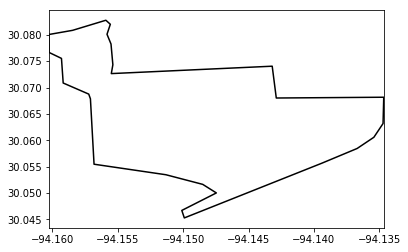

In [171]:
# Choose a random shape
x = random.randint(1,len(sf.shapes()))
shape_ex = sf.shape(x)

def plot_single_shape(shape_ex):
    # shape_ex.points contains list of lat/longs that define shape boundary
    # loop over points to create array of lat/longs to plot
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat,'k') # use bounding box to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    
    # Calculate and display the centroid of the shape 
        # function calculate_shape_centroid comes from notebook 
    centroid = calculate_shape_centroid(shape_ex.points)
    print 'Centroid: ', centroid

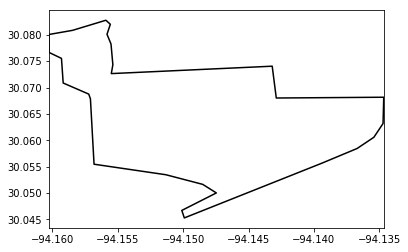

#### Plot all shapes in file

Plotting shapes as closed loops

Using matplotlib backend: Qt5Agg


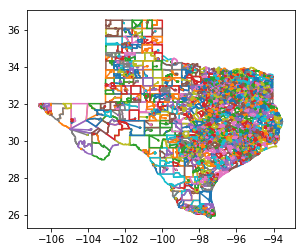

In [172]:
plt.figure()
ax = plt.axes()
ax.set_aspect('equal')

def plot_all_shapes(sf):
    for shape in list(sf.iterShapes()):
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]

        plt.plot(x_lon,y_lat)

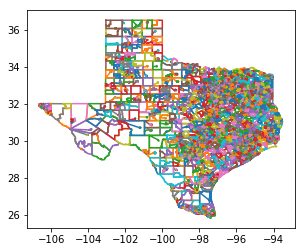